In [436]:
# coding: utf-8
import pandas as pd
from urllib.parse import quote

# Pull tables from Wikipedia
base  = "https://es.wikipedia.org/wiki/"
path  = "Anexo:Presidentes_del_Consejo_de_Ministros_del_Perú"
url   = base + quote(path)          # Per%C3%BA
primeTables = pd.read_html(url, flavor="bs4",
                      attrs={"class": "wikitable sortable"})

In [437]:
primeTables[0].head()

Titular                                    Partido           Gobierno  \
   Imagen                             Nombre Partido Partido.1 Gobierno   
0     NaN         José María Raygada y Gallo     NaN   Militar      NaN   
1     NaN  Manuel Ortiz de Zevallos y García     NaN       NaN      NaN   
2     NaN         Miguel de San Román y Meza     NaN   Militar      NaN   
3     NaN         Miguel del Carpio y Melgar     NaN       NaN      NaN   
4     NaN       Juan Antonio Pezet Rodríguez     NaN   Militar      NaN   

                                             Inicio                    Fin  
                  Gobierno.1                 Inicio                    Fin  
0  Ramón Castilla (2.º gob.)  14 de febrero de 1857     13 de mayo de 1858  
1  Ramón Castilla (2.º gob.)     13 de mayo de 1858    13 de julio de 1858  
2  Ramón Castilla (2.º gob.)    13 de julio de 1858  24 de octubre de 1858  
3  Ramón Castilla (2.º gob.)                   1859     9 de junio de 1860  
4  Ramón Castilla (2.º gob.)     9 de junio de 1860                   1862

In [433]:
primeTables[1].head()

Titular                                 Partido                    Gobierno  \
   Imagen                          Nombre Partido          Partido.1 Gobierno   
0     NaN   Manuel María Gálvez Egúsquiza     NaN                NaN      NaN   
1     NaN       Enrique de la Riva Agüero     NaN      Partido Civil      NaN   
2     NaN  Enrique Coronel-Zegarra Castro     NaN  Partido Demócrata      NaN   
3     NaN      Domingo M. Almenara Butler     NaN                NaN      NaN   
4     NaN        Cesáreo Chacaltana Reyes     NaN      Partido Civil      NaN   

                                              Inicio                       Fin  
                Gobierno.1                    Inicio                       Fin  
0  Eduardo López de Romaña   8 de septiembre de 1899   14 de diciembre de 1899  
1  Eduardo López de Romaña   14 de diciembre de 1899      30 de agosto de 1900  
2  Eduardo López de Romaña      30 de agosto de 1900      2 de octubre de 1900  
3  Eduardo López de Romaña      2 de octubre de 1900  11 de septiembre de 1901  
4  Eduardo López de Romaña  11 de septiembre de 1901       9 de agosto de 1902

In [434]:
primeTables[2].head()

Titular                                       Partido                     \
   Imagen                                Nombre Partido          Partido.1   
0     NaN  Javier Pérez de Cuéllar de la Guerra     NaN  Unión por el Perú   
1     NaN                 Roberto Dañino Zapata     NaN      Independiente   
2     NaN              Luis Solari de la Fuente     NaN       Perú Posible   
3     NaN                 Beatriz Merino Lucero     NaN      Independiente   
4     NaN                  Carlos Ferrero Costa     NaN       Perú Posible   

  Gobierno                                      Inicio  \
  Gobierno         Gobierno.1                   Inicio   
0      NaN  Valentín Paniagua  22 de noviembre de 2000   
1      NaN   Alejandro Toledo      28 de julio de 2001   
2      NaN   Alejandro Toledo      12 de julio de 2002   
3      NaN   Alejandro Toledo      23 de junio de 2003   
4      NaN   Alejandro Toledo  15 de diciembre de 2003   

                       Fin  Tiempo en el cargo  
                       Fin  Tiempo en el cargo  
0     28 de julio del 2001    8 meses y 6 días  
1      11 de julio de 2002  11 meses y 13 días  
2      23 de junio de 2003   11 meses y 2 días  
3  12 de diciembre de 2003   6 meses y 19 días  
4     15 de agosto de 2005     1 año y 8 meses

In [30]:
# coding: utf-8
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://es.wikipedia.org/wiki/Anexo:Presidentes_del_Consejo_de_Ministros_del_Per%C3%BA"

try:
    response = requests.get(url)
    response.raise_for_status()
    response.encoding = 'utf-8'
    soup = BeautifulSoup(response.text, 'html.parser')

    all_tables = soup.find_all('table', {'class': 'wikitable'})
    dfs = []  # List to store individual DataFrames

    for table in all_tables:
        data = []
        headers = [th.text.strip() for th in table.find_all('th')]
        # Append headers (even if empty)
        data.append(headers)

        rows = table.find_all('tr')[1:]
        for row in rows:
            cols = [td.text.strip() for td in row.find_all('td')]
            if cols:
                data.append(cols)

        # Create DataFrame, allowing for mismatched column counts
        if data:
            df = pd.DataFrame(data[1:], columns=data[0] if data[0] else None)
            dfs.append(df)

    if dfs:
        final_df = pd.concat(dfs, ignore_index=True, sort=False)
        print(final_df.head())
    else:
        print("No tables with class 'wikitable' found on the page.")

except requests.exceptions.RequestException as e:
    print(f"Error fetching the URL: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: 7 columns passed, passed data had 8 columns


In [164]:
headers

['Titular', 'Partido', 'Gobierno', 'Inicio', 'Fin', 'Imagen', 'Nombre']

In [73]:
data0 = []
headers0 = [th.text.strip() for th in all_tables[0].find_all('th')]
data0.append(headers0)

rows0 = all_tables[0].find_all('tr')[1:]
for row in rows0:
    cols = [td.text.strip() for td in row.find_all('td')]
    if cols:
        data0.append(cols)
pd.DataFrame(data0).tail()

,0,1,2,3,4,5,6,7
75,,Manuel Antonio Barinaga,,,30 de noviembre de 1895,5 de agosto de 1896,None,None
76,,Manuel Pablo Olaechea Guerrero,,Partido Demócrata,8 de agosto de 1896,3 de noviembre de 1897,None,None
77,,Alejandro López de Romaña Alvizuri,,Partido Demócrata,25 de noviembre de 1897,23 de diciembre de 1897,None,None
78,,Enrique de la Riva Agüero,,,23 de diciembre de 1897,13 de mayo de 1898,None,None
79,,José Jorge Loayza,,,16 de mayo de 1898,8 de septiembre de 1899,None,None


In [ ]:
df0=pd.DataFrame(data0)

for row in range(1,df0.shape[0]):
    print(len([d for d in df0.iloc[row,:].to_list() if (d!="" and d!=None)]))
    print([d for d in df0.iloc[row,:].to_list() if (d!="" and d!=None)])


In [159]:
data0 = []
headers0 = [th.text.strip() for th in all_tables[0].find_all('th')]
data0.append(headers0)

rows0 = all_tables[0].find_all('tr')[1:]
for row in rows0:
    cols = [td.text.strip() for td in row.find_all('td')]
    if cols:
        data0.append(cols)


df0=pd.DataFrame(data0)
allRows0=[]
import re
for row in range(1,df0.shape[0]):
    currentList=[d for d in df0.iloc[row,:].to_list() if (d!=None)][1:]
    bye=currentList.pop(1)
    if len(currentList)==6:
        currentList.remove('')
    #     if currentList[1].startswith('Partido|Inde'):
    # if len(currentList)==6:
    
    #     currentList.insert(1,None)
    if len(currentList)==4:
        if currentList[1]=='':
            currentList[1]=None
            currentList.insert(2,None)
    if currentList[1]=='':
        currentList[1]=None        
    if len(currentList)==4:
        currentList.insert(2,None)
        # print(currentList)
    allRows0.append(currentList)
    
#print(allRows1)
df0=pd.DataFrame(allRows0) 
df0.to_csv('df0.csv',index=False)

In [156]:
data1 = []
headers1 = [th.text.strip() for th in all_tables[1].find_all('th')]
data1.append(headers1)

rows1 = all_tables[1].find_all('tr')[1:]
for row in rows1:
    cols = [td.text.strip() for td in row.find_all('td')]
    if cols:
        data1.append(cols)

df1=pd.DataFrame(data1)
allRows1=[]
import re
for row in range(1,df1.shape[0]):
    currentList=[d for d in df1.iloc[row,:].to_list() if (d!=None)][1:]
    bye=currentList.pop(1)
    if len(currentList)==6:
        currentList.remove('')
    #     if currentList[1].startswith('Partido|Inde'):
    # if len(currentList)==6:
    
    #     currentList.insert(1,None)
    if len(currentList)==4:
        if currentList[1]=='':
            currentList[1]=None
            currentList.insert(2,None)
    if currentList[1]=='':
        currentList[1]=None        
    if len(currentList)==4:
        currentList.insert(2,None)
        # print(currentList)
    allRows1.append(currentList)
    
#print(allRows1)
df1=pd.DataFrame(allRows1) 
df1.to_csv('df1.csv',index=False)

In [225]:
data2 = []
headers2 = [th.text.strip() for th in all_tables[2].find_all('th')]
data2.append(headers2)

rows2 = all_tables[2].find_all('tr')[1:]
for row in rows2:
    cols = [td.text.strip() for td in row.find_all('td')]
    if cols:
        data2.append(cols)

df2=pd.DataFrame(data2)
allRows2=[]
for row in range(1,df2.shape[0]):
    currentList=[d for d in df2.iloc[row,:].to_list() if (d!="" and d!=None)]
    if len(currentList)==5:
        currentList.insert(2,None)
    allRows2.append(currentList)
df2=pd.DataFrame(allRows2) 
df2.to_csv('df2.csv',index=False)

In [167]:

headers=['Titular', 'Partido', 'Gobierno', 'Inicio', 'Fin']
df0df1=pd.concat([df0,df1],ignore_index=True)
df0df1.columns=headers
df0df1['duracion']=None
df0df1

,Titular,Partido,Gobierno,Inicio,Fin,duracion
0,José María Raygada y Gallo,Militar,Ramón Castilla (2.º gob.),14 de febrero de 1857,13 de mayo de 1858,None
1,Manuel Ortiz de Zevallos y García,None,None,13 de mayo de 1858,13 de julio de 1858,None
2,Miguel de San Román y Meza,Militar,None,13 de julio de 1858,24 de octubre de 1858,None
3,Miguel del Carpio y Melgar,None,None,1859,9 de junio de 1860,None
4,Juan Antonio Pezet Rodríguez,Militar,None,9 de junio de 1860,1862,None
...,...,...,...,...,...,...
185,Javier Valle-Riestra González-Olaechea,Partido Aprista Peruano,None,4 de junio de 1998,21 de agosto de 1998,None
186,Alberto Pandolfi Arbulú,Cambio 90 - Nueva Mayoría,None,21 de agosto de 1998,4 de junio de 1999,None
187,Víctor Joy Way Rojas,Cambio 90 - Nueva Mayoría,None,3 de enero de 1999,10 de octubre de 1999,None
188,Alberto Bustamante Belaúnde,Independiente,None,10 de octubre de 1999,29 de julio de 2000,None


In [176]:
df0df1[(df0df1['Inicio'].str.len() == 4) | ((df0df1['Fin'].str.len() == 4))]

,Titular,Partido,Gobierno,Inicio,Fin,duracion
3,Miguel del Carpio y Melgar,None,None,1859,9 de junio de 1860,None
4,Juan Antonio Pezet Rodríguez,Militar,None,9 de junio de 1860,1862,None
5,Juan Antonio Ribeyro Estada,None,None,1862,24 de octubre de 1862,None


In [180]:
df0df1.loc[3,'Inicio']='28 de octubre de 1858'
df0df1.loc[4,'Fin']="1 de enero de 1862"
df0df1.loc[5,'Inicio']="1 de enero de 1862"

In [244]:
df0df1[df0df1.iloc[:,[3,4]].isna().any(axis=1)]

,Titular,Partido,Gobierno,Inicio,Fin,duracion
134,Carlos Arenas y Loayza,24 de diciembre de 1934,18 de mayo de 1935,None,None,None


In [249]:
df0df1.loc[134,'Inicio']='24 de diciembre de 1934'
df0df1.loc[134,'Fin']='18 de mayo de 1935'
df0df1.loc[134,'Partido']=None
df0df1.loc[134,'Gobierno']=None
df0df1.loc[134,:]

Titular      Carlos Arenas y Loayza
Partido                        None
Gobierno                       None
Inicio      24 de diciembre de 1934
Fin              18 de mayo de 1935
duracion                       None
Name: 134, dtype: object

In [211]:
# df2[~df2.loc[:,[3,4]].dropna().index,:]
df2[df2.loc[:,[3,4]].isna().any(axis=1)]

,0,1,2,3,4,5
20,Martín Vizcarra,23 de marzo de 2018,2 de abril de 2018,None,None,None


In [212]:
df2.loc[18:22,:]

,0,1,2,3,4,5
18,Fernando Zavala Lombardi,Independiente,Pedro Pablo Kuczynski,28 de julio de 2016,15 de septiembre de 2017,"1 año, 1 mes, y 17 días"
19,Mercedes Aráoz Fernández,Peruanos por el Kambio,None,17 de septiembre de 2017,23 de marzo de 2018,6 meses y 16 días
20,Martín Vizcarra,23 de marzo de 2018,2 de abril de 2018,None,None,None
21,César Villanueva Arévalo,Alianza para el Progreso,None,2 de abril de 2018,8 de marzo de 2019,11 meses y 6 días
22,Salvador del Solar Labarthe,Independiente,None,11 de marzo de 2019,30 de septiembre de 2019,6 meses y 19 días


In [227]:
df2.loc[19,4]='2 de abril de 2018'
df2.loc[19,2]='Martín Vizcarra y Pedro Pablo Kuczynski'
df2.loc[21,2]='Martín Vizcarra'

df2.drop(index=20,inplace=True)
df2.reset_index(drop=True,inplace=True)
df2

,0,1,2,3,4,5
0,Javier Pérez de Cuéllar de la Guerra,Unión por el Perú,Valentín Paniagua,22 de noviembre de 2000,28 de julio del 2001,8 meses y 6 días
1,Roberto Dañino Zapata,Independiente,Alejandro Toledo,28 de julio de 2001,11 de julio de 2002,11 meses y 13 días
2,Luis Solari de la Fuente,Perú Posible,None,12 de julio de 2002,23 de junio de 2003,11 meses y 2 días
3,Beatriz Merino Lucero,Independiente,None,23 de junio de 2003,12 de diciembre de 2003,6 meses y 19 días
4,Carlos Ferrero Costa,Perú Posible,None,15 de diciembre de 2003,15 de agosto de 2005,1 año y 8 meses
5,Pedro Pablo Kuczynski Godard,Independiente,None,16 de agosto de 2005,28 de julio de 2006,11 meses y 12 días
6,Jorge del Castillo Gálvez,Partido Aprista Peruano,Alan García,28 de julio de 2006,10 de octubre de 2008,"2 años, 2 meses y 12 días"
7,Yehude Simón Munaro,Partido Humanista Peruano,None,14 de octubre de 2008,11 de julio de 2009,8 meses y 27 días
8,Javier Velásquez Quesquén,Partido Aprista Peruano,None,11 de julio de 2009,13 de septiembre de 2010,"1 año, 2 meses y 2 días"
9,José Antonio Chang Escobedo,Independiente,None,14 de septiembre de 2010,18 de marzo de 2011,6 meses y 4 días


In [220]:
df2.loc[20,2:4]

2    2 de abril de 2018
3                  None
4                  None
Name: 20, dtype: object

In [218]:
df2.loc[18:22,:]

,0,1,2,3,4,5
18,Fernando Zavala Lombardi,Independiente,Pedro Pablo Kuczynski,28 de julio de 2016,15 de septiembre de 2017,"1 año, 1 mes, y 17 días"
19,Mercedes Aráoz Fernández,Peruanos por el Kambio,None,17 de septiembre de 2017,23 de marzo de 2018,6 meses y 16 días
20,Martín Vizcarra,23 de marzo de 2018,Martín Vizcarra,23 de marzo de 2018,2 de abril de 2018,None
21,César Villanueva Arévalo,Alianza para el Progreso,None,2 de abril de 2018,8 de marzo de 2019,11 meses y 6 días
22,Salvador del Solar Labarthe,Independiente,None,11 de marzo de 2019,30 de septiembre de 2019,6 meses y 19 días


In [250]:
df2.columns=df0df1.columns
primes=pd.concat([df0df1,df2],ignore_index=True)
primes.to_csv('primes.csv')

In [251]:
primes

,Titular,Partido,Gobierno,Inicio,Fin,duracion
0,José María Raygada y Gallo,Militar,Ramón Castilla (2.º gob.),14 de febrero de 1857,13 de mayo de 1858,None
1,Manuel Ortiz de Zevallos y García,None,None,13 de mayo de 1858,13 de julio de 1858,None
2,Miguel de San Román y Meza,Militar,None,13 de julio de 1858,24 de octubre de 1858,None
3,Miguel del Carpio y Melgar,None,None,28 de octubre de 1858,9 de junio de 1860,None
4,Juan Antonio Pezet Rodríguez,Militar,None,9 de junio de 1860,1 de enero de 1862,None
...,...,...,...,...,...,...
220,Aníbal Torres Vásquez,Independiente,None,8 de febrero de 2022,24 de noviembre de 2022,9 meses y 16 días
221,Betssy Chávez Chino,Perú Libre,None,25 de noviembre de 2022,7 de diciembre de 2022,13 días
222,Pedro Angulo Arana,Independiente,Dina Boluarte,10 de diciembre de 2022,21 de diciembre de 2022,11 días
223,Alberto Otárola Peñaranda,Independiente,None,21 de diciembre de 2022,5 de marzo de 2024,"1 año, 2 meses y 15 días"


In [265]:
primes[['ini_d','ini_m','ini_y']]=primes.Inicio.str.split(' de ',expand=True)

In [267]:
primes[primes.ini_y.isnull()]

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y
43,Mariano Nicolás Valcárcel,None,None,1 abril de 1883,octubre de 1883,None,1 abril,1883,None


In [268]:
primes.loc[18,'Inicio']='1 de septiembre de 1867'
primes.loc[42,'Inicio']='10 de enero de 1883'
primes.loc[43,'Inicio']='1 de abril de 1883'
primes.loc[147,'Inicio']='15 de julio de 1956'

In [269]:
primes[['ini_d','ini_m','ini_y']]=primes.Inicio.str.split(' de ',expand=True)

In [270]:
primes[primes.ini_y.isnull()]

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y


In [285]:
primes['Fin']=primes.Fin.str.replace('del','de')

In [288]:
primes[['fin_d','fin_m','fin_y']]=primes.Fin.str.split(' de ',expand=True).loc[:,0:2]

In [289]:
primes[primes.fin_y.isnull()]

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y
41,Camilo N. Carrillo Martínez,Marino,None,4 de septiembre de 1882,enero de 1883,None,4,septiembre,1882,enero,1883,None
42,Manuel Velarde Seoane,Militar,None,10 de enero de 1883,abril de 1883,None,10,enero,1883,abril,1883,None
43,Mariano Nicolás Valcárcel,None,None,1 de abril de 1883,octubre de 1883,None,1,abril,1883,octubre,1883,None
146,Roque Saldías Maninat,Marino,None,9 de agosto de 1954,junio de 1956,None,9,agosto,1954,junio,1956,None
224,Gustavo Adrianzén Olaya,Independiente,None,6 de marzo de 2024,En el cargo,1 año y 2 meses,6,marzo,2024,En el cargo,None,None


In [292]:
primes['bad']=primes.Fin.str.split(' de ',expand=True).loc[:,3]

In [294]:
primes[~primes['bad'].isnull()]

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y,bad
86,José Pardo y Barreda,Partido Civil,Manuel Candamo Iriarte,8 de septiembre de 1903,18 de abril de 1904 14 de mayo de 1904,None,8,septiembre,1903,18,abril,1904 14,mayo


In [296]:
primes.loc[85:89,:]

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y,bad
85,Eugenio Larrabure y Unanue,None,None,4 de noviembre de 1902,8 de septiembre de 1903,None,4,noviembre,1902,8,septiembre,1903,None
86,José Pardo y Barreda,Partido Civil,Manuel Candamo Iriarte,8 de septiembre de 1903,18 de abril de 1904 14 de mayo de 1904,None,8,septiembre,1903,18,abril,1904 14,mayo
87,José Pardo y Barreda (continuación),Partido Civil,Serapio Calderón Chirinos,18 de abril de 1904,14 de mayo de 1904,None,18,abril,1904,14,mayo,1904,None
88,Alberto Elmore Fernández,None,None,14 de mayo de 1904,24 de septiembre de 1904,None,14,mayo,1904,24,septiembre,1904,None
89,Augusto Leguía,Partido Civil,José Pardo y Barreda (1.º gob.),24 de septiembre de 1904,1 de agosto de 1907,None,24,septiembre,1904,1,agosto,1907,None


In [300]:
primes.loc[86,'Fin']='14 de mayo de 1904'
primes.loc[88,'Gobierno']='Serapio Calderón Chirinos'
primes.drop(index=87,inplace=True)
primes.reset_index(drop=True,inplace=True)

In [302]:
primes[['fin_d','fin_m','fin_y']]=primes.Fin.str.split(' de ',expand=True)

In [303]:
primes.columns

Index(['Titular', 'Partido', 'Gobierno', 'Inicio', 'Fin', 'duracion', 'ini_d',
       'ini_m', 'ini_y', 'fin_d', 'fin_m', 'fin_y', 'bad'],
      dtype='object')

In [304]:
primes.drop(columns='bad',inplace=True)

In [305]:
primes[primes.fin_y.isnull()]

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y
41,Camilo N. Carrillo Martínez,Marino,None,4 de septiembre de 1882,enero de 1883,None,4,septiembre,1882,enero,1883,None
42,Manuel Velarde Seoane,Militar,None,10 de enero de 1883,abril de 1883,None,10,enero,1883,abril,1883,None
43,Mariano Nicolás Valcárcel,None,None,1 de abril de 1883,octubre de 1883,None,1,abril,1883,octubre,1883,None
145,Roque Saldías Maninat,Marino,None,9 de agosto de 1954,junio de 1956,None,9,agosto,1954,junio,1956,None
223,Gustavo Adrianzén Olaya,Independiente,None,6 de marzo de 2024,En el cargo,1 año y 2 meses,6,marzo,2024,En el cargo,None,None


In [306]:
primes.loc[41,'Fin']='10 de enero de 1883'
primes.loc[42,'Fin']='1 de abril de 1883'
primes.loc[43,'Fin']='1 de octubre de 1883'
primes.loc[145,'Fin']='15 de julio de 1956'
primes.loc[223,'Fin']='28 de julio de 2025'

In [307]:
primes[['fin_d','fin_m','fin_y']]=primes.Fin.str.split(' de ',expand=True)

In [308]:
primes[primes.fin_y.isnull()]

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y


In [309]:
primes

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y
0,José María Raygada y Gallo,Militar,Ramón Castilla (2.º gob.),14 de febrero de 1857,13 de mayo de 1858,None,14,febrero,1857,13,mayo,1858
1,Manuel Ortiz de Zevallos y García,None,None,13 de mayo de 1858,13 de julio de 1858,None,13,mayo,1858,13,julio,1858
2,Miguel de San Román y Meza,Militar,None,13 de julio de 1858,24 de octubre de 1858,None,13,julio,1858,24,octubre,1858
3,Miguel del Carpio y Melgar,None,None,28 de octubre de 1858,9 de junio de 1860,None,28,octubre,1858,9,junio,1860
4,Juan Antonio Pezet Rodríguez,Militar,None,9 de junio de 1860,1 de enero de 1862,None,9,junio,1860,1,enero,1862
...,...,...,...,...,...,...,...,...,...,...,...,...
219,Aníbal Torres Vásquez,Independiente,None,8 de febrero de 2022,24 de noviembre de 2022,9 meses y 16 días,8,febrero,2022,24,noviembre,2022
220,Betssy Chávez Chino,Perú Libre,None,25 de noviembre de 2022,7 de diciembre de 2022,13 días,25,noviembre,2022,7,diciembre,2022
221,Pedro Angulo Arana,Independiente,Dina Boluarte,10 de diciembre de 2022,21 de diciembre de 2022,11 días,10,diciembre,2022,21,diciembre,2022
222,Alberto Otárola Peñaranda,Independiente,None,21 de diciembre de 2022,5 de marzo de 2024,"1 año, 2 meses y 15 días",21,diciembre,2022,5,marzo,2024


In [312]:
primes[primes.isnull().any(axis=1)]

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y
0,José María Raygada y Gallo,Militar,Ramón Castilla (2.º gob.),14 de febrero de 1857,13 de mayo de 1858,None,14,febrero,1857,13,mayo,1858
1,Manuel Ortiz de Zevallos y García,None,None,13 de mayo de 1858,13 de julio de 1858,None,13,mayo,1858,13,julio,1858
2,Miguel de San Román y Meza,Militar,None,13 de julio de 1858,24 de octubre de 1858,None,13,julio,1858,24,octubre,1858
3,Miguel del Carpio y Melgar,None,None,28 de octubre de 1858,9 de junio de 1860,None,28,octubre,1858,9,junio,1860
4,Juan Antonio Pezet Rodríguez,Militar,None,9 de junio de 1860,1 de enero de 1862,None,9,junio,1860,1,enero,1862
...,...,...,...,...,...,...,...,...,...,...,...,...
218,Héctor Valer Pinto,Somos Perú,None,1 de febrero de 2022,8 de febrero de 2022[11]​,7 días,1,febrero,2022,8,febrero,2022[11]​
219,Aníbal Torres Vásquez,Independiente,None,8 de febrero de 2022,24 de noviembre de 2022,9 meses y 16 días,8,febrero,2022,24,noviembre,2022
220,Betssy Chávez Chino,Perú Libre,None,25 de noviembre de 2022,7 de diciembre de 2022,13 días,25,noviembre,2022,7,diciembre,2022
222,Alberto Otárola Peñaranda,Independiente,None,21 de diciembre de 2022,5 de marzo de 2024,"1 año, 2 meses y 15 días",21,diciembre,2022,5,marzo,2024


In [337]:
primes[primes.Gobierno.str.contains('[^a-zA-Z\s]', regex=True,na=False)]


,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y
0,José María Raygada y Gallo,Militar,Ramón Castilla (2.º gob.),14 de febrero de 1857,13 de mayo de 1858,None,14,febrero,1857,13,mayo,1858
6,José Gregorio Paz Soldán y Ureta,None,Miguel de San Román,24 de octubre de 1862,3 de abril de 1863,None,24,octubre,1862,3,abril,1863
15,Mariano Ignacio Prado Ochoa[3]​,Militar,Mariano Ignacio Prado (1.º gob.),26 de noviembre de 1865,15 de febrero de 1867,None,26,noviembre,1865,15,febrero,1867
22,Pedro Gálvez Egúsquiza,None,José Balta,2 de agosto de 1868,13 de abril de 1869,None,2,agosto,1868,13,abril,1869
30,Antonio Arenas Merino,None,Mariano Ignacio Prado (2.º gob.),2 de agosto de 1876,26 de agosto de 1876,None,2,agosto,1876,26,agosto,1876
37,Aurelio Denegri Valega,Partido Civil,Francisco García Calderón Landa,12 de marzo de 1881,18 de julio de 1881,None,12,marzo,1881,18,julio,1881
39,Aurelio García y García,Marino,Nicolás de Piérola (provisorio),30 de octubre de 1881,28 de noviembre de 1881,None,30,octubre,1881,28,noviembre,1881
49,Pedro Alejandrino del Solar Gabas,Partido Constitucional,Andrés Avelino Cáceres (1.º gob.),3 de junio de 1886,6 de octubre de 1886,None,3,junio,1886,6,octubre,1886
59,Mariano Nicolás Valcárcel Salazar,None,Remigio Morales Bermúdez,10 de agosto de 1890,24 de julio de 1891,None,10,agosto,1890,24,julio,1891
70,Baltasar García Urrutia Muro,None,Justiniano Borgoño Castañeda,1 de abril de 1894,10 de agosto de 1894,None,1,abril,1894,10,agosto,1894


In [343]:
set(primes.Gobierno.str.split('\s\(',expand=True)[1].to_list())

{'1.º gob.)', '2.º gob.)', None, 'provisorio)'}

In [345]:
primes['Gobierno']=primes.Gobierno.str.split('\s\(',expand=True)[0]

In [347]:
primes['Gobierno']=primes['Gobierno'].ffill()

In [348]:
primes

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y
0,José María Raygada y Gallo,Militar,Ramón Castilla,14 de febrero de 1857,13 de mayo de 1858,None,14,febrero,1857,13,mayo,1858
1,Manuel Ortiz de Zevallos y García,None,Ramón Castilla,13 de mayo de 1858,13 de julio de 1858,None,13,mayo,1858,13,julio,1858
2,Miguel de San Román y Meza,Militar,Ramón Castilla,13 de julio de 1858,24 de octubre de 1858,None,13,julio,1858,24,octubre,1858
3,Miguel del Carpio y Melgar,None,Ramón Castilla,28 de octubre de 1858,9 de junio de 1860,None,28,octubre,1858,9,junio,1860
4,Juan Antonio Pezet Rodríguez,Militar,Ramón Castilla,9 de junio de 1860,1 de enero de 1862,None,9,junio,1860,1,enero,1862
...,...,...,...,...,...,...,...,...,...,...,...,...
219,Aníbal Torres Vásquez,Independiente,Pedro Castillo,8 de febrero de 2022,24 de noviembre de 2022,9 meses y 16 días,8,febrero,2022,24,noviembre,2022
220,Betssy Chávez Chino,Perú Libre,Pedro Castillo,25 de noviembre de 2022,7 de diciembre de 2022,13 días,25,noviembre,2022,7,diciembre,2022
221,Pedro Angulo Arana,Independiente,Dina Boluarte,10 de diciembre de 2022,21 de diciembre de 2022,11 días,10,diciembre,2022,21,diciembre,2022
222,Alberto Otárola Peñaranda,Independiente,Dina Boluarte,21 de diciembre de 2022,5 de marzo de 2024,"1 año, 2 meses y 15 días",21,diciembre,2022,5,marzo,2024


In [351]:
primes.ini_m.value_counts().index

Index(['julio', 'agosto', 'octubre', 'diciembre', 'noviembre', 'septiembre',
       'abril', 'mayo', 'junio', 'enero', 'febrero', 'marzo'],
      dtype='object', name='ini_m')

In [356]:
primes.fin_m.value_counts().index

Index(['julio', 'agosto', 'octubre', 'noviembre', 'diciembre', 'abril',
       'septiembre', 'mayo', 'junio', 'febrero', 'enero', 'marzo'],
      dtype='object', name='fin_m')

In [360]:
nums=[7,8,10,12,11,9,4,5,6,1,2,3]

In [357]:
newMonth={m:str(n) for m,n in zip(primes.ini_m.value_counts().index,nums)}
newMonth

{'julio': '7',
 'agosto': '8',
 'octubre': '10',
 'diciembre': '12',
 'noviembre': '11',
 'septiembre': '9',
 'abril': '4',
 'mayo': '5',
 'junio': '6',
 'enero': '1',
 'febrero': '2',
 'marzo': '3'}

In [358]:
primes.replace({'ini_m':newMonth,'fin_m':newMonth})

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y
0,José María Raygada y Gallo,Militar,Ramón Castilla,14 de febrero de 1857,13 de mayo de 1858,None,14,2,1857,13,5,1858
1,Manuel Ortiz de Zevallos y García,None,Ramón Castilla,13 de mayo de 1858,13 de julio de 1858,None,13,5,1858,13,7,1858
2,Miguel de San Román y Meza,Militar,Ramón Castilla,13 de julio de 1858,24 de octubre de 1858,None,13,7,1858,24,10,1858
3,Miguel del Carpio y Melgar,None,Ramón Castilla,28 de octubre de 1858,9 de junio de 1860,None,28,10,1858,9,6,1860
4,Juan Antonio Pezet Rodríguez,Militar,Ramón Castilla,9 de junio de 1860,1 de enero de 1862,None,9,6,1860,1,1,1862
...,...,...,...,...,...,...,...,...,...,...,...,...
219,Aníbal Torres Vásquez,Independiente,Pedro Castillo,8 de febrero de 2022,24 de noviembre de 2022,9 meses y 16 días,8,2,2022,24,11,2022
220,Betssy Chávez Chino,Perú Libre,Pedro Castillo,25 de noviembre de 2022,7 de diciembre de 2022,13 días,25,11,2022,7,12,2022
221,Pedro Angulo Arana,Independiente,Dina Boluarte,10 de diciembre de 2022,21 de diciembre de 2022,11 días,10,12,2022,21,12,2022
222,Alberto Otárola Peñaranda,Independiente,Dina Boluarte,21 de diciembre de 2022,5 de marzo de 2024,"1 año, 2 meses y 15 días",21,12,2022,5,3,2024


In [364]:
pd.to_datetime({'year': primes.ini_y,
                   'month': primes.ini_m,
                   'day': primes.ini_d})

ValueError: Unable to parse string "2020[8]​" at position 214

In [380]:
primes[primes['Inicio'].str.contains('[^0-9a-zA-Z\s]') | (primes['Fin'].str.contains('[^0-9a-zA-Z\s]'))]

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y
214,Ántero Flores-Aráoz Esparza,Independiente,Manuel Merino,11 de noviembre de 2020[8]​,17 de noviembre de 2020,6 días,11,noviembre,2020[8]​,17,noviembre,2020
215,Violeta Bermúdez Valdivia,Independiente,Francisco Sagasti,18 de noviembre de 2020[9]​,28 de julio de 2021,8 meses y 7 días,18,noviembre,2020[9]​,28,julio,2021
216,Guido Bellido Ugarte,Perú Libre,Pedro Castillo,29 de julio de 2021[10]​,6 de octubre de 2021,2 meses y 8 días,29,julio,2021[10]​,6,octubre,2021
218,Héctor Valer Pinto,Somos Perú,Pedro Castillo,1 de febrero de 2022,8 de febrero de 2022[11]​,7 días,1,febrero,2022,8,febrero,2022[11]​


In [381]:
primes['Inicio']=primes.Inicio.str.split('[',expand=True)[0]
primes['Fin']=primes.Fin.str.split('[',expand=True)[0]

In [382]:
primes[['ini_d','ini_m','ini_y']]=primes.Inicio.str.split(' de ',expand=True)
primes[['fin_d','fin_m','fin_y']]=primes.Fin.str.split(' de ',expand=True)

In [383]:
primes.replace({'ini_m':newMonth,'fin_m':newMonth},inplace=True)

In [384]:
primes

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y
0,José María Raygada y Gallo,Militar,Ramón Castilla,14 de febrero de 1857,13 de mayo de 1858,None,14,2,1857,13,5,1858
1,Manuel Ortiz de Zevallos y García,None,Ramón Castilla,13 de mayo de 1858,13 de julio de 1858,None,13,5,1858,13,7,1858
2,Miguel de San Román y Meza,Militar,Ramón Castilla,13 de julio de 1858,24 de octubre de 1858,None,13,7,1858,24,10,1858
3,Miguel del Carpio y Melgar,None,Ramón Castilla,28 de octubre de 1858,9 de junio de 1860,None,28,10,1858,9,6,1860
4,Juan Antonio Pezet Rodríguez,Militar,Ramón Castilla,9 de junio de 1860,1 de enero de 1862,None,9,6,1860,1,1,1862
...,...,...,...,...,...,...,...,...,...,...,...,...
219,Aníbal Torres Vásquez,Independiente,Pedro Castillo,8 de febrero de 2022,24 de noviembre de 2022,9 meses y 16 días,8,2,2022,24,11,2022
220,Betssy Chávez Chino,Perú Libre,Pedro Castillo,25 de noviembre de 2022,7 de diciembre de 2022,13 días,25,11,2022,7,12,2022
221,Pedro Angulo Arana,Independiente,Dina Boluarte,10 de diciembre de 2022,21 de diciembre de 2022,11 días,10,12,2022,21,12,2022
222,Alberto Otárola Peñaranda,Independiente,Dina Boluarte,21 de diciembre de 2022,5 de marzo de 2024,"1 año, 2 meses y 15 días",21,12,2022,5,3,2024


In [386]:
primes['start']=pd.to_datetime({'year': primes.ini_y,
                   'month': primes.ini_m,
                   'day': primes.ini_d})
primes['end']=pd.to_datetime({'year': primes.fin_y,
                   'month': primes.fin_m,
                   'day': primes.fin_d})

In [389]:
primes['date_difference'] = primes['end'] - primes['start']
primes['days_duration'] = primes['date_difference'].dt.days
primes

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y,start,end,date_difference,days_duration
0,José María Raygada y Gallo,Militar,Ramón Castilla,14 de febrero de 1857,13 de mayo de 1858,None,14,2,1857,13,5,1858,1857-02-14,1858-05-13,453 days,453
1,Manuel Ortiz de Zevallos y García,None,Ramón Castilla,13 de mayo de 1858,13 de julio de 1858,None,13,5,1858,13,7,1858,1858-05-13,1858-07-13,61 days,61
2,Miguel de San Román y Meza,Militar,Ramón Castilla,13 de julio de 1858,24 de octubre de 1858,None,13,7,1858,24,10,1858,1858-07-13,1858-10-24,103 days,103
3,Miguel del Carpio y Melgar,None,Ramón Castilla,28 de octubre de 1858,9 de junio de 1860,None,28,10,1858,9,6,1860,1858-10-28,1860-06-09,590 days,590
4,Juan Antonio Pezet Rodríguez,Militar,Ramón Castilla,9 de junio de 1860,1 de enero de 1862,None,9,6,1860,1,1,1862,1860-06-09,1862-01-01,571 days,571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Aníbal Torres Vásquez,Independiente,Pedro Castillo,8 de febrero de 2022,24 de noviembre de 2022,9 meses y 16 días,8,2,2022,24,11,2022,2022-02-08,2022-11-24,289 days,289
220,Betssy Chávez Chino,Perú Libre,Pedro Castillo,25 de noviembre de 2022,7 de diciembre de 2022,13 días,25,11,2022,7,12,2022,2022-11-25,2022-12-07,12 days,12
221,Pedro Angulo Arana,Independiente,Dina Boluarte,10 de diciembre de 2022,21 de diciembre de 2022,11 días,10,12,2022,21,12,2022,2022-12-10,2022-12-21,11 days,11
222,Alberto Otárola Peñaranda,Independiente,Dina Boluarte,21 de diciembre de 2022,5 de marzo de 2024,"1 año, 2 meses y 15 días",21,12,2022,5,3,2024,2022-12-21,2024-03-05,440 days,440


In [391]:
primes.to_excel('primes.xlsx',index=False)
primes.to_pickle('primes.pkl')

In [405]:
primes[primes['end']<=primes['start']]

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y,start,end,date_difference,days_duration
19,Pedro Paz Soldán y Ureta,None,Mariano Ignacio Prado,12 de octubre de 1867,8 de enero de 1868,None,12,10,1868,8,1,1868,1868-10-12,1868-01-08,-278 days,-278


In [404]:
primes.loc[19,'Inicio']='12 de octubre de 1867'

In [407]:
primes[['ini_d','ini_m','ini_y']]=primes.Inicio.str.split(' de ',expand=True)
primes[['fin_d','fin_m','fin_y']]=primes.Fin.str.split(' de ',expand=True)

primes.replace({'ini_m':newMonth,'fin_m':newMonth},inplace=True)

primes['start']=pd.to_datetime({'year': primes.ini_y,
                   'month': primes.ini_m,
                   'day': primes.ini_d})
primes['end']=pd.to_datetime({'year': primes.fin_y,
                   'month': primes.fin_m,
                   'day': primes.fin_d})

primes['date_difference'] = primes['end'] - primes['start']
primes['days_duration'] = primes['date_difference'].dt.days
primes

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y,start,end,date_difference,days_duration
0,José María Raygada y Gallo,Militar,Ramón Castilla,14 de febrero de 1857,13 de mayo de 1858,None,14,2,1857,13,5,1858,1857-02-14,1858-05-13,453 days,453
1,Manuel Ortiz de Zevallos y García,None,Ramón Castilla,13 de mayo de 1858,13 de julio de 1858,None,13,5,1858,13,7,1858,1858-05-13,1858-07-13,61 days,61
2,Miguel de San Román y Meza,Militar,Ramón Castilla,13 de julio de 1858,24 de octubre de 1858,None,13,7,1858,24,10,1858,1858-07-13,1858-10-24,103 days,103
3,Miguel del Carpio y Melgar,None,Ramón Castilla,28 de octubre de 1858,9 de junio de 1860,None,28,10,1858,9,6,1860,1858-10-28,1860-06-09,590 days,590
4,Juan Antonio Pezet Rodríguez,Militar,Ramón Castilla,9 de junio de 1860,1 de enero de 1862,None,9,6,1860,1,1,1862,1860-06-09,1862-01-01,571 days,571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Aníbal Torres Vásquez,Independiente,Pedro Castillo,8 de febrero de 2022,24 de noviembre de 2022,9 meses y 16 días,8,2,2022,24,11,2022,2022-02-08,2022-11-24,289 days,289
220,Betssy Chávez Chino,Perú Libre,Pedro Castillo,25 de noviembre de 2022,7 de diciembre de 2022,13 días,25,11,2022,7,12,2022,2022-11-25,2022-12-07,12 days,12
221,Pedro Angulo Arana,Independiente,Dina Boluarte,10 de diciembre de 2022,21 de diciembre de 2022,11 días,10,12,2022,21,12,2022,2022-12-10,2022-12-21,11 days,11
222,Alberto Otárola Peñaranda,Independiente,Dina Boluarte,21 de diciembre de 2022,5 de marzo de 2024,"1 año, 2 meses y 15 días",21,12,2022,5,3,2024,2022-12-21,2024-03-05,440 days,440


In [408]:
primes.to_excel('primes.xlsx',index=False)
primes.to_pickle('primes.pkl')

In [409]:
primes[primes['end']<=primes['start']]

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y,start,end,date_difference,days_duration


In [411]:
primes.days_duration.describe()

count     224.000000
mean      269.593750
std       274.274567
min         1.000000
25%        90.000000
50%       185.500000
75%       346.000000
max      1822.000000
Name: days_duration, dtype: float64

In [414]:
primes[primes['days_duration']==primes['days_duration'].max()]

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y,start,end,date_difference,days_duration
137,Alfredo Solf y Muro,None,Manuel Prado Ugarteche,8 de diciembre de 1939,3 de diciembre de 1944,None,8,12,1939,3,12,1944,1939-12-08,1944-12-03,1822 days,1822


<Axes: >

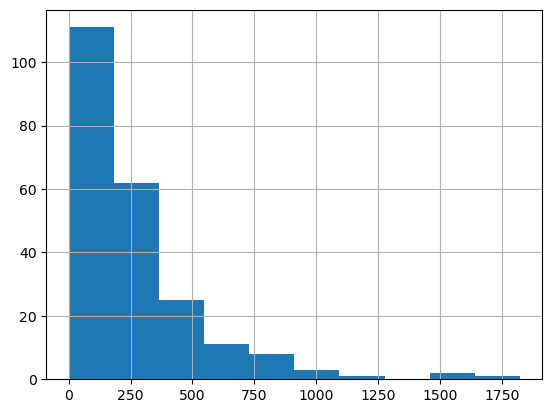

In [419]:
primes['days_duration'].hist()

In [454]:
primes=pd.read_pickle('primes.pkl')

In [459]:
bins = pd.to_datetime(['1857-02-14','1980-07-28','1990-07-28', '2000-11-21', '2025-07-28'])
primes['era'] = pd.cut(primes['start'], bins=bins, labels=['D.before_1980','A.PreFujimori', 'B.Fujimori', 'C.PostFujimori'], right=False)
primes


,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y,start,end,date_difference,days_duration,era
0,José María Raygada y Gallo,Militar,Ramón Castilla,14 de febrero de 1857,13 de mayo de 1858,None,14,2,1857,13,5,1858,1857-02-14,1858-05-13,453 days,453,D.before_1980
1,Manuel Ortiz de Zevallos y García,None,Ramón Castilla,13 de mayo de 1858,13 de julio de 1858,None,13,5,1858,13,7,1858,1858-05-13,1858-07-13,61 days,61,D.before_1980
2,Miguel de San Román y Meza,Militar,Ramón Castilla,13 de julio de 1858,24 de octubre de 1858,None,13,7,1858,24,10,1858,1858-07-13,1858-10-24,103 days,103,D.before_1980
3,Miguel del Carpio y Melgar,None,Ramón Castilla,28 de octubre de 1858,9 de junio de 1860,None,28,10,1858,9,6,1860,1858-10-28,1860-06-09,590 days,590,D.before_1980
4,Juan Antonio Pezet Rodríguez,Militar,Ramón Castilla,9 de junio de 1860,1 de enero de 1862,None,9,6,1860,1,1,1862,1860-06-09,1862-01-01,571 days,571,D.before_1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Aníbal Torres Vásquez,Independiente,Pedro Castillo,8 de febrero de 2022,24 de noviembre de 2022,9 meses y 16 días,8,2,2022,24,11,2022,2022-02-08,2022-11-24,289 days,289,C.PostFujimori
220,Betssy Chávez Chino,Perú Libre,Pedro Castillo,25 de noviembre de 2022,7 de diciembre de 2022,13 días,25,11,2022,7,12,2022,2022-11-25,2022-12-07,12 days,12,C.PostFujimori
221,Pedro Angulo Arana,Independiente,Dina Boluarte,10 de diciembre de 2022,21 de diciembre de 2022,11 días,10,12,2022,21,12,2022,2022-12-10,2022-12-21,11 days,11,C.PostFujimori
222,Alberto Otárola Peñaranda,Independiente,Dina Boluarte,21 de diciembre de 2022,5 de marzo de 2024,"1 año, 2 meses y 15 días",21,12,2022,5,3,2024,2022-12-21,2024-03-05,440 days,440,C.PostFujimori


In [460]:
primes.to_excel('primes.xlsx',index=False)
primes.to_pickle('primes.pkl')

In [461]:
primes

,Titular,Partido,Gobierno,Inicio,Fin,duracion,ini_d,ini_m,ini_y,fin_d,fin_m,fin_y,start,end,date_difference,days_duration,era
0,José María Raygada y Gallo,Militar,Ramón Castilla,14 de febrero de 1857,13 de mayo de 1858,None,14,2,1857,13,5,1858,1857-02-14,1858-05-13,453 days,453,D.before_1980
1,Manuel Ortiz de Zevallos y García,None,Ramón Castilla,13 de mayo de 1858,13 de julio de 1858,None,13,5,1858,13,7,1858,1858-05-13,1858-07-13,61 days,61,D.before_1980
2,Miguel de San Román y Meza,Militar,Ramón Castilla,13 de julio de 1858,24 de octubre de 1858,None,13,7,1858,24,10,1858,1858-07-13,1858-10-24,103 days,103,D.before_1980
3,Miguel del Carpio y Melgar,None,Ramón Castilla,28 de octubre de 1858,9 de junio de 1860,None,28,10,1858,9,6,1860,1858-10-28,1860-06-09,590 days,590,D.before_1980
4,Juan Antonio Pezet Rodríguez,Militar,Ramón Castilla,9 de junio de 1860,1 de enero de 1862,None,9,6,1860,1,1,1862,1860-06-09,1862-01-01,571 days,571,D.before_1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Aníbal Torres Vásquez,Independiente,Pedro Castillo,8 de febrero de 2022,24 de noviembre de 2022,9 meses y 16 días,8,2,2022,24,11,2022,2022-02-08,2022-11-24,289 days,289,C.PostFujimori
220,Betssy Chávez Chino,Perú Libre,Pedro Castillo,25 de noviembre de 2022,7 de diciembre de 2022,13 días,25,11,2022,7,12,2022,2022-11-25,2022-12-07,12 days,12,C.PostFujimori
221,Pedro Angulo Arana,Independiente,Dina Boluarte,10 de diciembre de 2022,21 de diciembre de 2022,11 días,10,12,2022,21,12,2022,2022-12-10,2022-12-21,11 days,11,C.PostFujimori
222,Alberto Otárola Peñaranda,Independiente,Dina Boluarte,21 de diciembre de 2022,5 de marzo de 2024,"1 año, 2 meses y 15 días",21,12,2022,5,3,2024,2022-12-21,2024-03-05,440 days,440,C.PostFujimori


In [462]:
primes.columns

Index(['Titular', 'Partido', 'Gobierno', 'Inicio', 'Fin', 'duracion', 'ini_d',
       'ini_m', 'ini_y', 'fin_d', 'fin_m', 'fin_y', 'start', 'end',
       'date_difference', 'days_duration', 'era'],
      dtype='object')

In [467]:
primes.drop(columns=['Inicio', 'Fin', 'duracion', 'ini_d','ini_m', 'ini_y', 'fin_d', 'fin_m', 'fin_y','date_difference'],inplace=True)
primes

,Titular,Partido,Gobierno,start,end,days_duration,era
0,José María Raygada y Gallo,Militar,Ramón Castilla,1857-02-14,1858-05-13,453,D.before_1980
1,Manuel Ortiz de Zevallos y García,None,Ramón Castilla,1858-05-13,1858-07-13,61,D.before_1980
2,Miguel de San Román y Meza,Militar,Ramón Castilla,1858-07-13,1858-10-24,103,D.before_1980
3,Miguel del Carpio y Melgar,None,Ramón Castilla,1858-10-28,1860-06-09,590,D.before_1980
4,Juan Antonio Pezet Rodríguez,Militar,Ramón Castilla,1860-06-09,1862-01-01,571,D.before_1980
...,...,...,...,...,...,...,...
219,Aníbal Torres Vásquez,Independiente,Pedro Castillo,2022-02-08,2022-11-24,289,C.PostFujimori
220,Betssy Chávez Chino,Perú Libre,Pedro Castillo,2022-11-25,2022-12-07,12,C.PostFujimori
221,Pedro Angulo Arana,Independiente,Dina Boluarte,2022-12-10,2022-12-21,11,C.PostFujimori
222,Alberto Otárola Peñaranda,Independiente,Dina Boluarte,2022-12-21,2024-03-05,440,C.PostFujimori


In [535]:
primesmodel=primes.copy()

In [536]:
primesmodel=primesmodel[primesmodel.era!='D.before_1980']

In [537]:
primesmodel['regime_fujimori']=0
primesmodel.loc[primesmodel.era=='B.Fujimori','regime_fujimori']=1
primesmodel['regime_fujimori'].value_counts()

regime_fujimori
0    44
1    13
Name: count, dtype: int64

In [538]:
primesmodel['yearEnd']=primesmodel.end.dt.year

In [539]:
# primesmodel['speechday_yearEnd']=
primesmodel['speechDay_yearEnd']=pd.to_datetime([str(y)+'07'+'28' for y in primesmodel.yearEnd])

In [540]:
primesmodel

,Titular,Partido,Gobierno,start,end,days_duration,era,regime_fujimori,yearEnd,speechDay_yearEnd
167,Manuel Ulloa Elías,Acción Popular,Fernando Belaúnde Terry,1980-07-28,1982-12-09,864,A.PreFujimori,0,1982,1982-07-28
168,Fernando Schwalb López-Aldana,Acción Popular,Fernando Belaúnde Terry,1982-12-09,1984-04-10,488,A.PreFujimori,0,1984,1984-07-28
169,Sandro Mariátegui Chiappe,Acción Popular,Fernando Belaúnde Terry,1984-04-10,1984-10-13,186,A.PreFujimori,0,1984,1984-07-28
170,Luis Pércovich Roca,Acción Popular,Fernando Belaúnde Terry,1984-10-13,1985-07-27,287,A.PreFujimori,0,1985,1985-07-28
171,Luis Alva Castro,Partido Aprista Peruano,Alan García,1985-07-28,1987-06-26,698,A.PreFujimori,0,1987,1987-07-28
172,Guillermo Larco Cox,Partido Aprista Peruano,Alan García,1987-06-27,1988-05-13,321,A.PreFujimori,0,1988,1988-07-28
173,Armando Villanueva del Campo,Partido Aprista Peruano,Alan García,1988-05-13,1989-05-15,367,A.PreFujimori,0,1989,1989-07-28
174,Luis Alberto Sánchez Sánchez,Partido Aprista Peruano,Alan García,1989-05-15,1989-09-30,138,A.PreFujimori,0,1989,1989-07-28
175,Guillermo Larco Cox,Partido Aprista Peruano,Alan García,1989-09-30,1990-07-27,300,A.PreFujimori,0,1990,1990-07-28
176,Juan Carlos Hurtado Miller,Acción Popular,Alberto Fujimori,1990-07-28,1991-02-20,207,B.Fujimori,1,1991,1991-07-28


In [541]:
primesmodel['diff_from_speechDay_yearEnd']=(primesmodel.end-primesmodel.speechDay_yearEnd).dt.days.abs()
primesmodel

,Titular,Partido,Gobierno,start,end,days_duration,era,regime_fujimori,yearEnd,speechDay_yearEnd,diff_from_speechDay_yearEnd
167,Manuel Ulloa Elías,Acción Popular,Fernando Belaúnde Terry,1980-07-28,1982-12-09,864,A.PreFujimori,0,1982,1982-07-28,134
168,Fernando Schwalb López-Aldana,Acción Popular,Fernando Belaúnde Terry,1982-12-09,1984-04-10,488,A.PreFujimori,0,1984,1984-07-28,109
169,Sandro Mariátegui Chiappe,Acción Popular,Fernando Belaúnde Terry,1984-04-10,1984-10-13,186,A.PreFujimori,0,1984,1984-07-28,77
170,Luis Pércovich Roca,Acción Popular,Fernando Belaúnde Terry,1984-10-13,1985-07-27,287,A.PreFujimori,0,1985,1985-07-28,1
171,Luis Alva Castro,Partido Aprista Peruano,Alan García,1985-07-28,1987-06-26,698,A.PreFujimori,0,1987,1987-07-28,32
172,Guillermo Larco Cox,Partido Aprista Peruano,Alan García,1987-06-27,1988-05-13,321,A.PreFujimori,0,1988,1988-07-28,76
173,Armando Villanueva del Campo,Partido Aprista Peruano,Alan García,1988-05-13,1989-05-15,367,A.PreFujimori,0,1989,1989-07-28,74
174,Luis Alberto Sánchez Sánchez,Partido Aprista Peruano,Alan García,1989-05-15,1989-09-30,138,A.PreFujimori,0,1989,1989-07-28,64
175,Guillermo Larco Cox,Partido Aprista Peruano,Alan García,1989-09-30,1990-07-27,300,A.PreFujimori,0,1990,1990-07-28,1
176,Juan Carlos Hurtado Miller,Acción Popular,Alberto Fujimori,1990-07-28,1991-02-20,207,B.Fujimori,1,1991,1991-07-28,158


In [542]:
primesmodel['speechEffect']=pd.cut(primesmodel['diff_from_speechDay_yearEnd'],bins=[0,15,30,45,1000],include_lowest=True,labels=[15,30,45,1],ordered=False)
primesmodel

,Titular,Partido,Gobierno,start,end,days_duration,era,regime_fujimori,yearEnd,speechDay_yearEnd,diff_from_speechDay_yearEnd,speechEffect
167,Manuel Ulloa Elías,Acción Popular,Fernando Belaúnde Terry,1980-07-28,1982-12-09,864,A.PreFujimori,0,1982,1982-07-28,134,1
168,Fernando Schwalb López-Aldana,Acción Popular,Fernando Belaúnde Terry,1982-12-09,1984-04-10,488,A.PreFujimori,0,1984,1984-07-28,109,1
169,Sandro Mariátegui Chiappe,Acción Popular,Fernando Belaúnde Terry,1984-04-10,1984-10-13,186,A.PreFujimori,0,1984,1984-07-28,77,1
170,Luis Pércovich Roca,Acción Popular,Fernando Belaúnde Terry,1984-10-13,1985-07-27,287,A.PreFujimori,0,1985,1985-07-28,1,15
171,Luis Alva Castro,Partido Aprista Peruano,Alan García,1985-07-28,1987-06-26,698,A.PreFujimori,0,1987,1987-07-28,32,45
172,Guillermo Larco Cox,Partido Aprista Peruano,Alan García,1987-06-27,1988-05-13,321,A.PreFujimori,0,1988,1988-07-28,76,1
173,Armando Villanueva del Campo,Partido Aprista Peruano,Alan García,1988-05-13,1989-05-15,367,A.PreFujimori,0,1989,1989-07-28,74,1
174,Luis Alberto Sánchez Sánchez,Partido Aprista Peruano,Alan García,1989-05-15,1989-09-30,138,A.PreFujimori,0,1989,1989-07-28,64,1
175,Guillermo Larco Cox,Partido Aprista Peruano,Alan García,1989-09-30,1990-07-27,300,A.PreFujimori,0,1990,1990-07-28,1,15
176,Juan Carlos Hurtado Miller,Acción Popular,Alberto Fujimori,1990-07-28,1991-02-20,207,B.Fujimori,1,1991,1991-07-28,158,1


In [545]:
primesmodel.rename(columns={'Titular':'PCM','Partido':'party','Gobierno':'presidentofExecutive'},inplace=True)
primesmodel.reset_index(drop=True,inplace=True)
primesmodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   PCM                          57 non-null     object        
 1   party                        57 non-null     object        
 2   presidentofExecutive         57 non-null     object        
 3   start                        57 non-null     datetime64[ns]
 4   end                          57 non-null     datetime64[ns]
 5   days_duration                57 non-null     int64         
 6   era                          57 non-null     category      
 7   regime_fujimori              57 non-null     int64         
 8   yearEnd                      57 non-null     int32         
 9   speechDay_yearEnd            57 non-null     datetime64[ns]
 10  diff_from_speechDay_yearEnd  57 non-null     int64         
 11  speechEffect                 57 non-null     ca

In [546]:
primesmodel.to_excel('primesmodel.xlsx',index=False)
primesmodel.to_pickle('primesmodel.pkl')